<a href="https://colab.research.google.com/github/Fabiha-Shaikh/calculator/blob/main/Fabiha_Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [7]:
df = pd.read_csv('Water_quality.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.331940,194.874065,16658.87650,7.993830,316.675162,335.120398,10.180514,59.572714,4.434820,0
1,7.145772,238.689929,28780.34043,6.814029,385.975650,332.032706,11.093163,66.138045,5.182591,0
2,9.920691,202.817483,NaN,6.882248,337.350529,333.192470,23.917601,71.833624,4.690707,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,NaN,4.075075,0


In [8]:
dataset = pd.read_csv('Water_quality.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [9]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 ph                 3
Hardness           3
Solids             3
Chloramines        3
Sulfate            5
Conductivity       3
Organic_carbon     4
Trihalomethanes    2
Turbidity          0
Potability         0
dtype: int64


In [10]:
df.fillna(df.mean(), inplace=True)

Dataset statistics:
                ph    Hardness        Solids  Chloramines     Sulfate  \
count  144.000000  144.000000    144.000000   144.000000  144.000000   
mean     7.265564  198.779323  22318.377612     7.260035  328.367571   
std      1.578210   29.131942   8691.549969     1.649001   44.500775   
min      1.757037   98.771644   4111.785432     2.741712  187.170714   
25%      6.345892  182.851476  16505.170900     6.218312  307.255440   
50%      7.194668  200.005640  21539.103975     7.292943  327.605968   
75%      8.318321  213.696660  27238.189995     8.222142  358.330459   
max     11.898078  280.082411  56351.396300    12.580026  445.938391   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  Potability  
count    144.000000      144.000000       144.000000  144.000000  144.000000  
mean     417.812223       14.498743        66.159559    3.990889    0.465278  
std       80.330361        3.381505        16.271348    0.805185    0.500534  
min      269.0

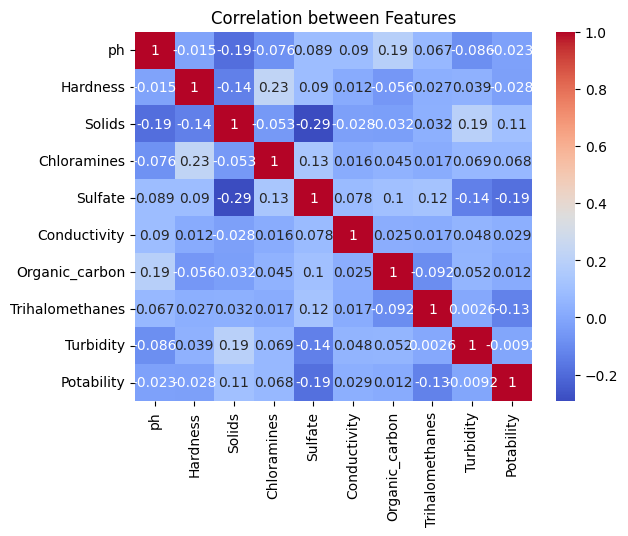

In [11]:
print("Dataset statistics:\n", df.describe())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Features")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state =0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
from sklearn.impute import SimpleImputer

# Create an imputer for replacing NaN values with the mean
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [19]:
print(classifier.predict(sc.transform([[5.33,194.88, 16659.00, 8, 316.5, 335.11, 10.11, 60.22, 4.32]])))

[0]


In [20]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 6  7]
 [11  5]]


In [22]:
accuracy_score(y_test, y_pred)

0.3793103448275862

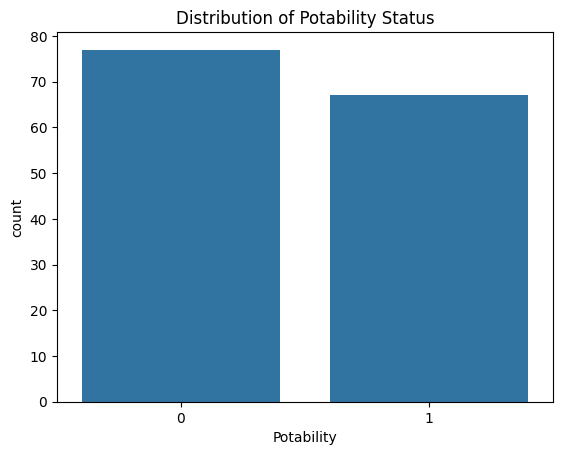

In [23]:
sns.countplot(data=df, x='Potability')
plt.title("Distribution of Potability Status")
plt.show()

In [24]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [29]:
# Model: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [30]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

Evaluation for Random Forest
Accuracy: 0.6551724137931034
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72        16
           1       0.67      0.46      0.55        13

    accuracy                           0.66        29
   macro avg       0.66      0.64      0.63        29
weighted avg       0.66      0.66      0.64        29



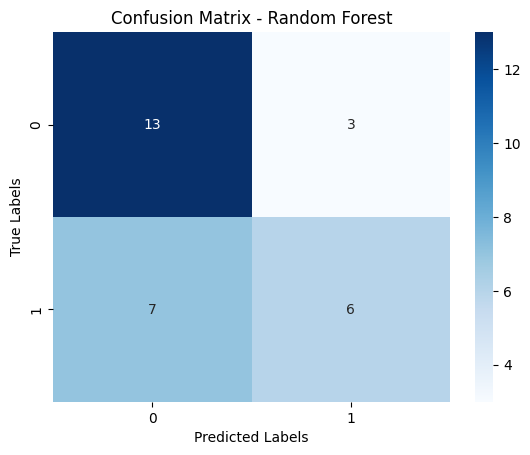

Evaluation for Decision Tree
Accuracy: 0.5862068965517241
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.53      0.62      0.57        13

    accuracy                           0.59        29
   macro avg       0.59      0.59      0.59        29
weighted avg       0.59      0.59      0.59        29



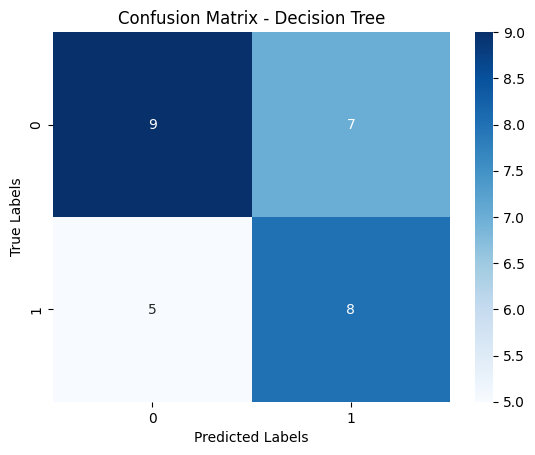

Evaluation for Logistic Regression
Accuracy: 0.4827586206896552
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.44      0.48        16
           1       0.44      0.54      0.48        13

    accuracy                           0.48        29
   macro avg       0.49      0.49      0.48        29
weighted avg       0.49      0.48      0.48        29



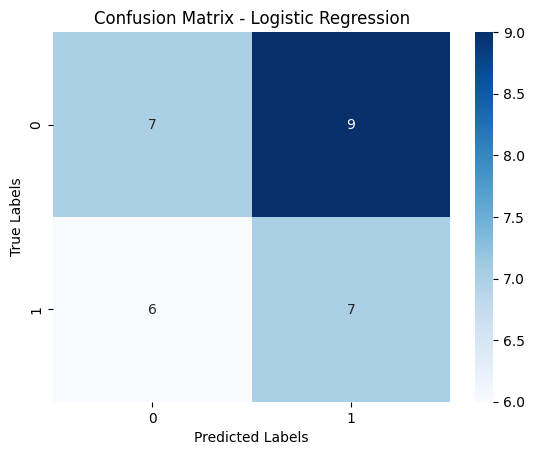

In [31]:
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

In [33]:
import joblib
joblib.dump(rf_model, 'water_quality_rf_model.pkl')

['water_quality_rf_model.pkl']

In [34]:
loaded_model = joblib.load('water_quality_rf_model.pkl')

In [35]:
sample_data = X_test[0].reshape(1, -1)
prediction = loaded_model.predict(sample_data)
print("Real-time prediction (Potability=1, Not Potability=0):", prediction)

Real-time prediction (Potability=1, Not Potability=0): [0]
